In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
import numpy as np
#import scipy.io
#import scipy.misc
import cv2

In [0]:
%matplotlib inline
import cv2 # OpenCV python용 라이브러리
import os, errno # 각 OS에 맞게 경로와 디렉토리 설정을 위한 라이브러리
import numpy as np # 빠른 행렬 연산을 위한 라이브러리
import pandas as pd # data를 쉽게 다루기 위한 라이브러리
import matplotlib.pyplot as plt # 그래프 및 이미지를 출력하기 위한 라이브러리
#from tqdm import tqdm_notebook, tqdm # 반복문의 진행정도를 알려주는 라이브러리
#from jupyterthemes import jtplot # jupyter theme에 맞게 plot을 해주는 라이브러리
#jtplot.style(theme='grade3', grid=False) # 설정한 테마에 맞게 plot 스타일 변경, grid 설정 끔
pd.set_option('display.max_colwidth', 1200) # pandas의 DataFrame에서 최대 column 너비를 1200px로 설정
plt.rc('ytick', labelsize=20) # matplotlib의 y축 label size를 20으로 고정
plt.rc('xtick', labelsize=20) # matplotlib의 x축 label size를 20으로 고정

%matplotlib inline
import cv2 # OpenCV python용 라이브러리
import os, errno # 각 OS에 맞게 경로와 디렉토리 설정을 위한 라이브러리
import numpy as np # 빠른 행렬 연산을 위한 라이브러리
import pandas as pd # data를 쉽게 다루기 위한 라이브러리
import matplotlib.pyplot as plt # 그래프 및 이미지를 출력하기 위한 라이브러리
#from tqdm import tqdm_notebook, tqdm # 반복문의 진행정도를 알려주는 라이브러리
#from jupyterthemes import jtplot # jupyter theme에 맞게 plot을 해주는 라이브러리
#jtplot.style(theme='grade3', grid=False) # 설정한 테마에 맞게 plot 스타일 변경, grid 설정 끔
pd.set_option('display.max_colwidth', 1200) # pandas의 DataFrame에서 최대 column 너비를 1200px로 설정
plt.rc('ytick', labelsize=20)
plt.rc('xtick', labelsize=20)

In [23]:
cwd = os.getcwd()
path = cwd + "/drive/My Drive/bolt/crop_data/"
valid_exts = [".png"]
print ("[%d] CATEGORIES ARE IN \n %s" % (len(os.listdir(path)), path))

categories = sorted(os.listdir(path))
ncategories = len(categories)
imgs = []
labels = []
train_imgs = []
train_labels = []
# LOAD ALL IMAGES 
for i, category in enumerate(categories):
    iter = 0
    for f in os.listdir(path + "/" + category):
        if iter == 0:
            ext = os.path.splitext(f)[1]
            if ext.lower() not in valid_exts:
                continue
            fullpath = os.path.join(path + "/" + category, f)
            img = cv2.resize(cv2.imread(fullpath), (320,320), cv2.INTER_AREA)
            #re_img = image_data_generator(img)
            img = img.astype('float32')
            img /= 255
            imgs.append(img) # NORMALIZE IMAGE 
            #train_imgs.append(re_img)
            label_curr = i
            labels.append(label_curr)
print ("Num imgs: %d" % (len(imgs)))
print ("Num labels: %d" % (len(labels)) )
print (ncategories)

[3] CATEGORIES ARE IN 
 /content/drive/My Drive/bolt/crop_data/
Num imgs: 1418
Num labels: 1418
3


In [0]:
#imgs = np.array(imgs)[:,:,:,np.newaxis]

In [0]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
from keras import regularizers
from sklearn.model_selection import StratifiedShuffleSplit
from keras import regularizers
import numpy as np

import matplotlib.pyplot as plt

In [0]:
nb_classes = int(ncategories)
labels_one_hot = np_utils.to_categorical(labels, nb_classes)
x_train, x_test, y_train, y_test = train_test_split(imgs,
                                                   labels_one_hot,
                                                   test_size = 0.2,
                                                   random_state= 17)

In [0]:
from random import randint
def image_data_generator(image, rotation = True, vertical_flip = True, horizontal_flip = True):
    height, width = image.shape[:2]
    #result_image = cv2.normalize(image, None, 0, 255, norm_type=cv2.NORM_MINMAX)
    result_image = image
    if rotation:
        rotation_list = [0, 90, 180, 270] # 회전할 각도 선택
        rotation_index = randint(0, 3) # 0 ~ 3 중에 하나 선택
        rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), rotation_list[rotation_index], 1)
        result_image = cv2.warpAffine(result_image, rotation_matrix, (width, height))
    
    # random으로 flip 여부를 결정
    vertical = randint(0, 1) # 수직 할지 말지
    horizontal = randint(0, 1) # 수평 할지 말지
    if vertical_flip and vertical:
        result_image = cv2.flip(result_image, 0)
    if horizontal_flip and horizontal:
        result_image = cv2.flip(result_image, 1)
    
    return result_image.copy()

In [0]:
x_train = np.array(x_train).astype('float32')
x_test = np.array(x_test).astype('float32')

In [0]:
new_x_train = []
new_y_train = []
for index in range(len(x_train)):
    re_image = image_data_generator(x_train[index,:,:,:].astype(np.uint8))
    new_x_train.append(re_image)
    new_y_train.append(y_train[index])

In [0]:
new_y_train = np.array(new_y_train)

In [0]:
new_x_train = np.array(new_x_train)


In [0]:
#x_train = np.append(x_train, new_x_train, axis= 0)
#y_train = np.append(y_train, new_y_train, axis = 0)

In [32]:
x_train.shape

(1134, 320, 320, 3)

In [33]:
y_train.shape

(1134, 3)

In [0]:
#y_test

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [0]:
IMG_CHANNELS = x_train.shape[-1]
IMG_ROWS = x_train.shape[1]
IMG_COLS = x_train.shape[1]

In [0]:
# 상수 정의
BATCH_SIZE = 16
NB_EPOCH = 500
NB_CLASSES = ncategories
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam(lr = 0.0001, decay=1e-5)
#OPTIM = RMSprop(lr=0.0001, decay=1e-5)

In [47]:
model = Sequential()
model.add(Conv2D(64, (3,3), strides=6, padding='same', activation='relu',
                input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3)))
model.add(Activation('relu'))
model.add(Conv2D(320, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(160))
model.add(Dense(80))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 54, 54, 64)        1792      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
activation_13 (Activation)   (None, 52, 52, 128)       0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 24, 24, 256)       295168    
_________________________________________________________________
activation_14 (Activation)   (None, 24, 24, 256)       0         
__________

In [48]:
model.compile(loss= 'categorical_crossentropy', optimizer = OPTIM,
             metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = BATCH_SIZE,
                   epochs = NB_EPOCH,
                   validation_split = VALIDATION_SPLIT,
                   verbose = VERBOSE)

print('Testing...')

score = model.evaluate(x_test, y_test,
                      batch_size = BATCH_SIZE,
                      verbose = VERBOSE)

print('\nTest score:', score[0])
print('Test accuracy:', score[1])


Train on 907 samples, validate on 227 samples
Epoch 1/500
907/907 [==============================] - 5s 6ms/step - loss: 1.1409 - acc: 0.3219 - val_loss: 1.0936 - val_acc: 0.3480
Epoch 2/500
907/907 [==============================] - 4s 4ms/step - loss: 1.0983 - acc: 0.3473 - val_loss: 1.0939 - val_acc: 0.3480
Epoch 3/500
907/907 [==============================] - 4s 4ms/step - loss: 1.0982 - acc: 0.3517 - val_loss: 1.0922 - val_acc: 0.4581
Epoch 4/500
907/907 [==============================] - 4s 4ms/step - loss: 1.0982 - acc: 0.3528 - val_loss: 1.0941 - val_acc: 0.3480
Epoch 5/500
907/907 [==============================] - 4s 4ms/step - loss: 1.0977 - acc: 0.3319 - val_loss: 1.0922 - val_acc: 0.3524
Epoch 6/500
907/907 [==============================] - 4s 4ms/step - loss: 1.0971 - acc: 0.3671 - val_loss: 1.0913 - val_acc: 0.4317
Epoch 7/500
907/907 [==============================] - 4s 4ms/step - loss: 1.0959 - acc: 0.3550 - val_loss: 1.0903 - val_acc: 0.3568
Epoch 8/500
907/907 [==

Text(0.5,1,'Accuracy Curves')

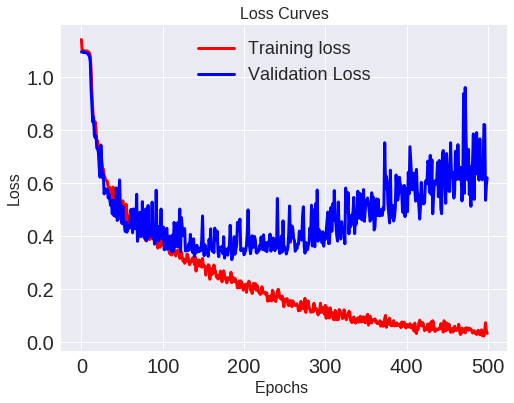

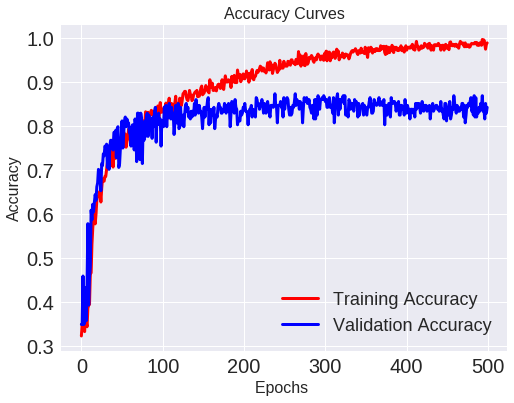

In [49]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)